# One-Dimensional Prisoner's Dilemma
### Ashton T. Sperry
#### ashton.sperry@ronininstitute.org

This notebook provides code for a one-dimensional Prisoner's Dilemma. It is close but not identical to an elementary cellular automaton (the model of the Prisoner's Dilemma is not entirely deterministic). More information can be found here: https://plato.stanford.edu/entries/prisoner-dilemma/. Three cells compose a local neighborhood with each one with a value of 0 or 1. '0' represents the strategy of Cooperation (i.e., the color white) and '1' represents Defection (i.e., the color black). The model converts a local neighborhood (composed of three cells) into a string of 0s and 1s, which are keys to a dictionary of payoffs.

I use some concepts of an elementary cellular automaton from Allen Downey's book Think Complexity, Second Edition: https://github.com/AllenDowney/ThinkComplexity2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class PrisonersDilemma1D:
    """Represents a 1-D Prisoner's Dilemma."""

    def __init__(self, payoffs, rows, cols = None):
        """Initializes the Prisoner's Dilemma.
        
        payoffs: the temptation, reward, punishment, and sucker payoffs.
        A: the numpy array that represents the automaton and contains the binary values.
        P: the numpy array that contains the payoffs.
        next: the index of the next empty row."""
        
        self.rows = rows
        self.cols = 2*rows + 1 if cols is None else cols
        self.payoffs = payoffs
        
        self.A = np.zeros((self.rows, self.cols), dtype = np.uint8)
        self.P = np.zeros_like(self.A)
        
        self.next = 0

    def init_single(self):
        """Starts with one cell in the middle of the top row."""
        self.A[0, self.cols//2] = 1
        self.next += 1

    def init_random(self):
        """Start with random values across the top row."""
        self.A[0] = np.random.random(self.cols).round()
        self.next += 1

    def loop(self):
        """Executes the given number of rows."""
        for r in range(self.rows-1):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array.
        
        A: represents the first array.
        P: represents the payoff array.
        t, r, p, s: the temptation, reward, punishment, and sucker payoffs.
        table: the dictionary to translate a local neighborhood into payoffs."""
        row = self.next
        cols = self.cols
        A = self.A
        P = self.P
        t, r, p, s = self.payoffs
        
        table = {'111': p + p, '110': p + t, '101': s + s, '100': s + r, 
                 '011': t + p, '010': t + t, '001': r + s, '000': r + r}
        
        for col in range(cols):
            P[row-1, col] = table[''.join(str(k) for k in 
                                          list((A[row-1, col-1], 
                                                A[row-1, col], 
                                                A[row-1, (col+1)%cols])))]
        
        """The following conditions determine how an agent imitates the
        best action from his local neighborhood. The use of modulo wraps
        each row as a chain."""
        for col in range(cols):
            if P[row-1, col] < P[row-1, col-1]:
                if P[row-1, col-1] < P[row-1, (col+1)%cols]:
                    A[row, col] = A[row-1, (col+1)%cols]
                
                elif P[row-1, col-1] > P[row-1, (col+1)%cols]:
                    A[row, col] = A[row-1, col-1]
                
                else:
                    """Random choice if there is a tie."""
                    A[row, col] = np.random.choice([A[row-1, col-1], 
                                                    A[row-1, (col+1)%cols]])
                
            elif P[row-1, col] < P[row-1, (col+1)%cols]:
                A[row, col] = A[row-1, (col+1)%cols]
                    
            else:
                A[row, col] = A[row-1, col]
        
        self.next += 1
    
    def plot_1D(self):
        fig = plt.figure(figsize=(12, 12))
        plt.imshow(self.A, cmap = 'binary', interpolation = 'none')
        plt.title("One-Dimensional Prisoner's Dilemma", fontsize = 'x-large')
        plt.show()
        #fig.savefig('PD_Single', dpi = 300, format = 'png')
        plt.close(fig)

We only need the payoffs and number of rows to initialize the automaton class.

In [3]:
payoffs = 3, 2, 1, 0   # The temptation, reward, punishment, and sucker payoffs.
rows = 25
single = PrisonersDilemma1D(payoffs, rows)

First, create the dictionary with your rule input. Second, initialize the first row (either with a single cell or random set of cells) of the Prisoner's Dilemma, Third, complete the game with the loop function. Fourth, plot the game.

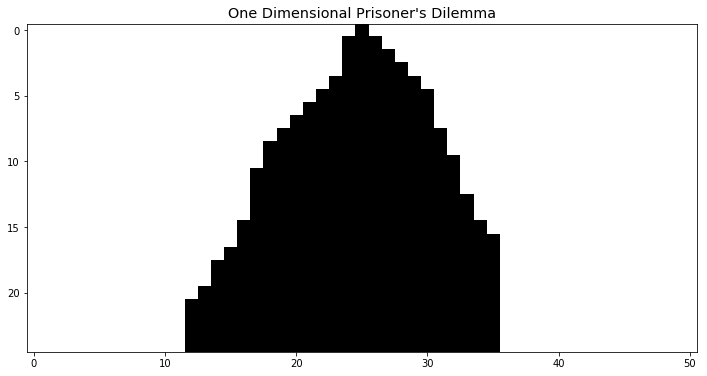

In [4]:
single.init_single()
single.loop()
single.plot_1D()

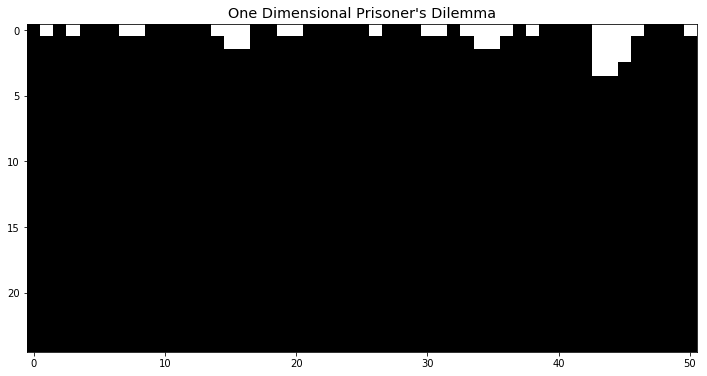

In [5]:
random = PrisonersDilemma1D(payoffs, rows)
random.init_random()
random.loop()
random.plot_1D()

The result is that the population converges towards the strategy Defection, which is a stable equilibrium.